# GECCO2018 Water Quality — EDA

This notebook explores the dataset structure, basic statistics, and distributions to inform model design.


In [ ]:
# Ensure project root on sys.path for `import src.*`
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))
print("sys.path bootstrapped with:", PROJECT_ROOT)


sys.path bootstrapped with: /home/nelso/Documents/IA - Detecção Falhas


In [2]:
# Imports and setup
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.data.loaders import load_gecco2018_csv
from src.features.preprocess import impute_and_scale
from src.visualization.plots import plot_pairwise_histograms


In [ ]:
# Load data
try:
    df = load_gecco2018_csv()
except FileNotFoundError as e:
    print(e)
    raise

print(df.shape)
df.head(20)


(139566, 12)


,Unnamed: 0,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
0,1,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False
1,2,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False
2,3,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False
3,4,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False
4,5,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False
5,6,2016-08-03 11:54:00,6.5,0.17,8.35,749.0,211.0,0.012,0.118,1553.0,689.0,False
6,7,2016-08-03 11:55:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1552.0,695.0,False
7,8,2016-08-03 11:56:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1603.0,694.0,False
8,9,2016-08-03 11:57:00,6.5,0.17,8.34,749.0,211.0,0.011,0.120,1559.0,700.0,False
9,10,2016-08-03 11:58:00,6.5,0.17,8.34,749.0,211.0,0.011,0.118,1604.0,690.0,False


In [20]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [21]:
# Basic info and missingness
print(df.info())
df.describe(include='all').T.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139566 entries, 0 to 139565
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    139566 non-null  object 
 1   Tp      138522 non-null  float64
 2   Cl      138521 non-null  float64
 3   pH      138522 non-null  float64
 4   Redox   138522 non-null  float64
 5   Leit    138522 non-null  float64
 6   Trueb   138522 non-null  float64
 7   Cl_2    138522 non-null  float64
 8   Fm      138522 non-null  float64
 9   Fm_2    138522 non-null  float64
 10  EVENT   139566 non-null  bool   
dtypes: bool(1), float64(9), object(1)
memory usage: 10.8+ MB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,139566,139506,2016-10-30 02:19:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tp,138522.0,NaN,NaN,NaN,8.521406,1.281314,0.0,7.5,8.4,9.5,11.8
Cl,138521.0,NaN,NaN,NaN,0.165482,0.010207,0.0,0.16,0.17,0.17,0.8
pH,138522.0,NaN,NaN,NaN,8.366416,0.101624,4.0,8.34,8.37,8.39,8.936228
Redox,138522.0,NaN,NaN,NaN,752.899009,12.945284,300.0,751.0,754.0,756.0,895.0
Leit,138522.0,NaN,NaN,NaN,209.520998,7.747497,0.0,209.0,211.0,211.0,646.0
Trueb,138522.0,NaN,NaN,NaN,0.019778,0.005492,0.0,0.016,0.018,0.023,0.254
Cl_2,138522.0,NaN,NaN,NaN,0.106099,0.007132,0.0,0.103,0.106,0.11,0.462
Fm,138522.0,NaN,NaN,NaN,1534.208891,208.171011,0.0,1388.0,1512.0,1650.0,3923.0
Fm_2,138522.0,NaN,NaN,NaN,927.728014,147.44743,0.0,847.0,925.0,1000.0,2592.0


In [22]:
df.isnull().sum()

Time        0
Tp       1044
Cl       1045
pH       1044
Redox    1044
Leit     1044
Trueb    1044
Cl_2     1044
Fm       1044
Fm_2     1044
EVENT       0
dtype: int64

#### 1044 linhas com valores nulos, provavelmente erros nos sensores.

In [24]:
# Mostrar algumas linhas do DataFrame que possuem valores nulos
df[df.isnull().any(axis=1)].head(20)


,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
37152,2016-08-29 07:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37153,2016-08-29 07:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37154,2016-08-29 07:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37155,2016-08-29 07:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37156,2016-08-29 07:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37157,2016-08-29 07:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37158,2016-08-29 07:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37159,2016-08-29 07:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37160,2016-08-29 07:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37161,2016-08-29 07:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


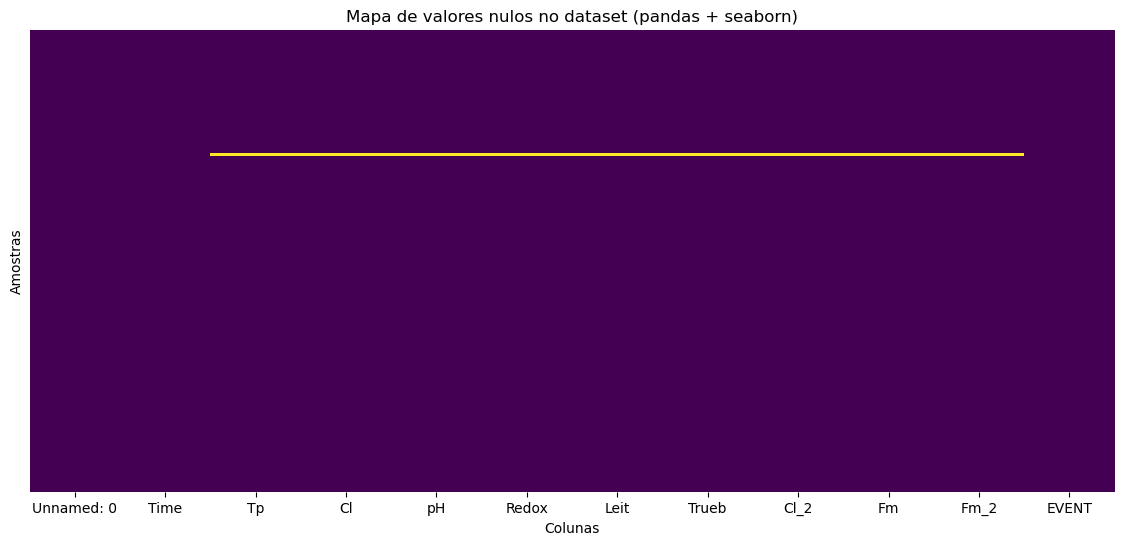

In [18]:
# Visualizar onde estão os valores nulos no dataset usando apenas pandas
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Mapa de valores nulos no dataset (pandas + seaborn)")
plt.xlabel("Colunas")
plt.ylabel("Amostras")
plt.show()



In [28]:
### vamos dropar as linhas com valores nulos
df = df.dropna()
df.isnull().sum()


Time     0
Tp       0
Cl       0
pH       0
Redox    0
Leit     0
Trueb    0
Cl_2     0
Fm       0
Fm_2     0
EVENT    0
dtype: int64

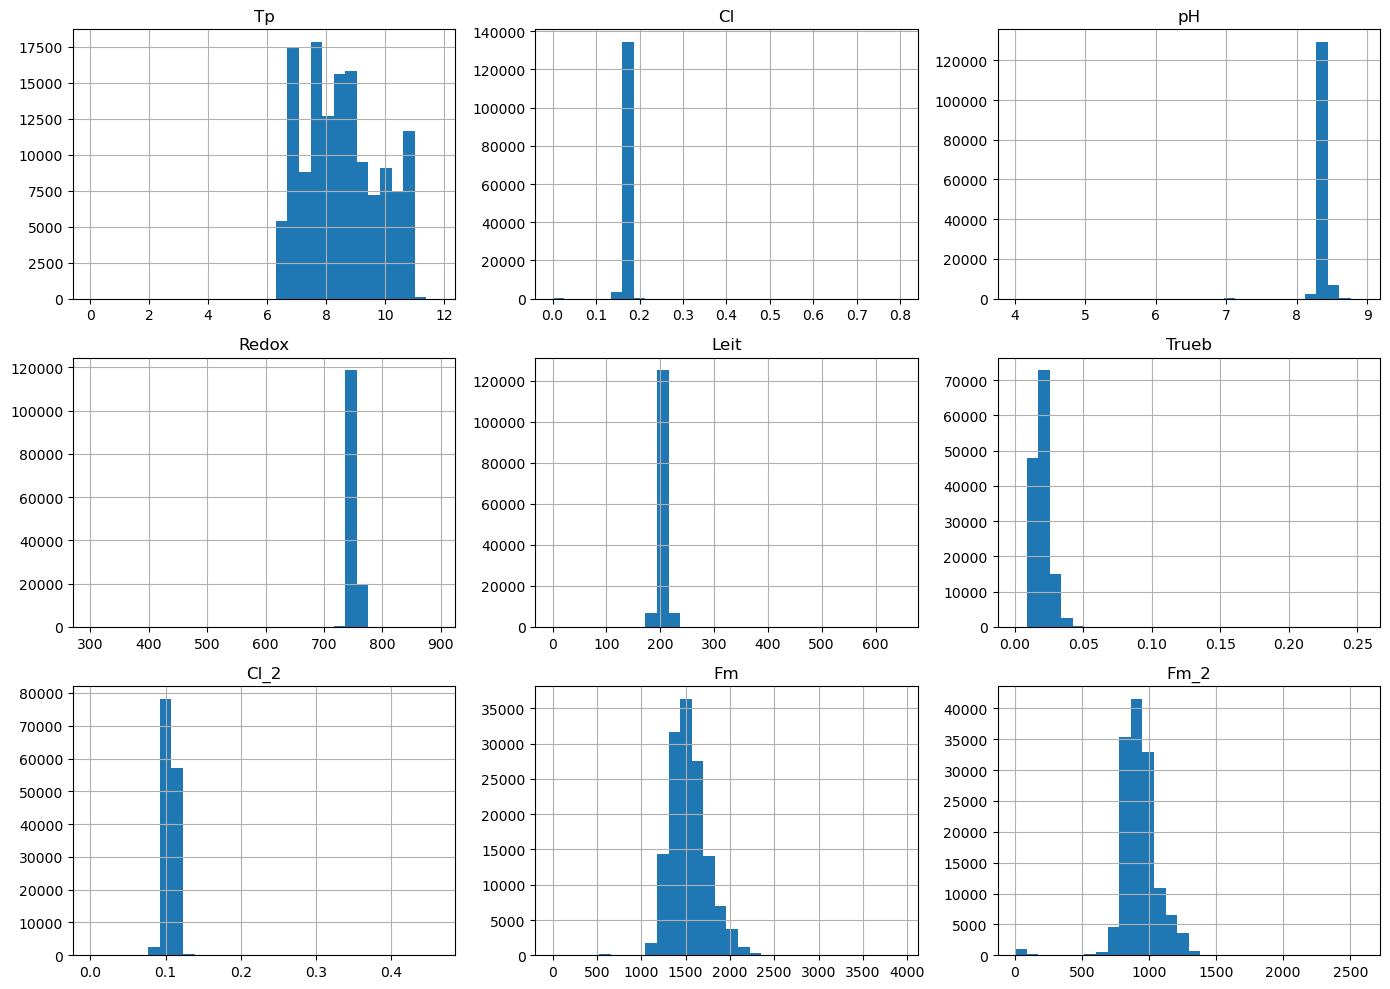

In [29]:
# Distribution plots
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plot_pairwise_histograms(df[numeric_cols], max_cols=12)


In [30]:
# Preprocessing quick pass
scaled_df, scaler = impute_and_scale(df)
print(scaled_df.shape)
scaled_df.head()


(138521, 9)


,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2
0,-1.577614,0.442646,-0.063129,-0.301193,0.190905,-1.598432,1.668810,0.685930,-1.578386
1,-1.577614,0.442646,-0.063129,-0.301193,0.190905,-1.598432,1.668810,0.128696,-1.571604
2,-1.577614,0.442646,-0.161530,-0.301193,0.190905,-1.598432,1.528588,0.224770,-1.571604
3,-1.577614,0.442646,-0.161530,-0.301193,0.190905,-1.598432,1.668810,0.215163,-1.591950
4,-1.577614,0.442646,-0.161530,-0.301193,0.190905,-1.598432,1.668810,0.157518,-1.619079


In [31]:
# Baseline anomaly scores
from src.models.baselines import run_all_baselines

X = scaled_df.values
scores = run_all_baselines(X)
for name, s in scores.items():
    print(name, np.asarray(s).shape, np.nanmean(s))


isolation_forest (138521,) -0.07984502719657019
lof (138521,) -0.9238093863024379


/home/nelso/miniconda3/envs/tastefinder/lib/python3.10/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
